In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
def cleaning_mt5_data_to_df(csv_file="US100_M5_202401020100_202405151950.csv"):
    df = pd.read_csv(csv_file)
    list_ = []
    for i in range(len(df)):
        row = df.iloc[i, 0]
        element = str(row).split("\t")
        list_.append(element)
    df1 = pd.DataFrame(list_)
    cols = df.columns[0]
    cols = cols.replace("<", "").replace(">", "").split("\t")
    df1.columns = cols
    df1.to_csv("cleaned/cleaned_"+csv_file)
    return df1

df = cleaning_mt5_data_to_df()


df.loc[:, 'CLOSE'] = df.loc[:, 'CLOSE'].astype(float)
df['OPEN'] = df['OPEN'].astype(float)

df['Close_Open'] = df.loc[:, 'CLOSE'] - df.loc[:, 'OPEN']
df['Long'] = df['Close_Open'] > 0
df_0930_1000 = df[(df.loc[:, 'TIME'] == "16:30:00") | (df.loc[:, 'TIME'] == "17:00:00")]
signal = []
for i in range(int(len(df_0930_1000)/2)):
    if df_0930_1000.iloc[i, -1] == True and df_0930_1000.iloc[i+1, -1] == True:
        signal.append("Buy")
        signal.append("Buy")
    elif df_0930_1000.iloc[i, -1] == False and df_0930_1000.iloc[i+1, -1] == False:
        signal.append("Sell")
        signal.append("Sell")
    else:
        signal.append("No action")
        signal.append("No action")
df_0930_1000.loc[:, 'signal'] = signal
df_0930_1000.loc[:, 'CLOSE_Open_0930'] = df_0930_1000.loc[:, 'OPEN'].shift(-1)
df_0930_1000.loc[:, 'Change_daily'] = df_0930_1000.loc[:, 'CLOSE'] - df_0930_1000.loc[:, 'CLOSE_Open_0930']
df1000 = df_0930_1000[df['TIME'] == "17:00:00"]

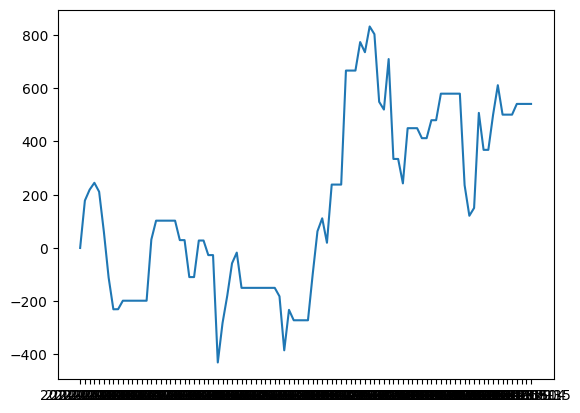

In [111]:
profit = []
profits = 0
signal = df1000.loc[:, "signal"]
signal = list(signal)
for i in range(len(df1000)):
    profit_point = df1000.iloc[i, -1]
    if signal[i] == "Buy": # signal
        profits += profit_point
        profit.append(profits)
    elif signal[i] == "Sell":
        profits += -profit_point
        profit.append(profits)
    else:
        profit.append(profits)
df1000['profit'] = profit
df1000['Date'] = df1000['DATE'].apply(lambda x: x.replace(".", "-"))
plt.plot(df1000['Date'], df1000['profit'], label='Proift')

In [80]:
df1000['profit']

192      0
468      0
744      0
1020     0
1296     0
        ..
25209    0
25485    0
25761    0
26037    0
26313    0
Name: profit, Length: 96, dtype: int64

In [76]:
df1000['DATE']

192      2024.01.02
468      2024.01.03
744      2024.01.04
1020     2024.01.05
1296     2024.01.08
            ...    
25209    2024.05.09
25485    2024.05.10
25761    2024.05.13
26037    2024.05.14
26313    2024.05.15
Name: DATE, Length: 96, dtype: object

In [ ]:
print(row)

In [9]:
df.iloc[0, 0]

'2024.01.02\t01:00:00\t16859.8\t16859.8\t16851.6\t16853.7\t231\t0\t17'

['2024.01.02',
 '01:05:00',
 '16854.5',
 '16861.1',
 '16853.7',
 '16861.1',
 '46',
 '0',
 '17']